# **Machine Predictive Maintenance Classification**

***Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, the data provided by the UCI repository is a synthetic dataset that reflects real predictive maintenance encountered in industry to the best of their knowledge.***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('predictive_maintenance.csv')
n = data.shape[0]

In [ ]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [ ]:
data.shape

(10000, 10)

In [ ]:
print('Features non-null values and data type:')
data.info()

Features non-null values and data type:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [ ]:
data.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [ ]:
# Set numeric columns dtype to float
data['Tool wear [min]'] = data['Tool wear [min]'].astype('float64')
data['Rotational speed [rpm]'] = data['Rotational speed [rpm]'].astype('float64')
# Rename features
data.rename(mapper={'Air temperature [K]': 'Air temperature',
                    'Process temperature [K]': 'Process temperature',
                    'Rotational speed [rpm]': 'Rotational speed',
                    'Torque [Nm]': 'Torque',
                    'Tool wear [min]': 'Tool wear'}, axis=1, inplace=True)

In [ ]:
# Drop ID columns
df = data.copy()
df.drop(columns=['UDI','Product ID'], inplace=True)

In [ ]:
# Create lists of features and target names
features = [col for col in df.columns
            if df[col].dtype=='float64' or col =='Type']
target = ['Target','Failure Type']
# Portion of data where RNF=1
idx_RNF = df.loc[df['Failure Type']=='Random Failures'].index
df.loc[idx_RNF,target]

,Target,Failure Type
1221,0,Random Failures
1302,0,Random Failures
1748,0,Random Failures
2072,0,Random Failures
2559,0,Random Failures
3065,0,Random Failures
3452,0,Random Failures
5471,0,Random Failures
5489,0,Random Failures
5495,0,Random Failures


In [ ]:
first_drop = df.loc[idx_RNF,target].shape[0]
print('Number of observations where RNF=1 but Machine failure=0:-',first_drop)
# Drop corresponding observations and RNF column
df.drop(index=idx_RNF, inplace=True)

Number of observations where RNF=1 but Machine failure=0:- 18


**Going forward we find out that in 9 observations Machine failure is set to 1 when all types of failures are set to 0. We cannot understand if there really was a failure or not so let’s remove these observations too.**

In [ ]:
# Portion of data where Machine failure=1 but no failure cause is specified
idx_ambiguous = df.loc[(df['Target']==1) &
                       (df['Failure Type']=='No Failure')].index
second_drop = df.loc[idx_ambiguous].shape[0]
print('Number of ambiguous observations:', second_drop)
display(df.loc[idx_ambiguous,target])
df.drop(index=idx_ambiguous, inplace=True)

Number of ambiguous observations: 9


,Target,Failure Type
1437,1,No Failure
2749,1,No Failure
4044,1,No Failure
4684,1,No Failure
5536,1,No Failure
5941,1,No Failure
6478,1,No Failure
8506,1,No Failure
9015,1,No Failure


In [ ]:
# Global percentage of removed observations
print('Global percentage of removed observations:',
     (100*(first_drop+second_drop)/n))
df.reset_index(drop=True, inplace=True)   # Reset index
n = df.shape[0]

Global percentage of removed observations: 0.27


**Our actions did not alterate the original data very much.**

### **Outliers inspection:**

**The goal of this section is to check if the dataset contains any outlier, which are usually misleading for machine learning algorithms.We begin by looking at a statistical report of the numerical features.** 

In [ ]:
df.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target
count,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000,9973.000000
mean,300.003259,310.004031,1538.893212,39.978993,107.921087,0.033089
std,2.000548,1.483692,179.412171,9.966805,63.649152,0.178879
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,301.500000,311.100000,1612.000000,46.700000,162.000000,0.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Air temperature          3.2
Process temperature      2.3
Rotational speed       189.0
Torque                  13.5
Tool wear              109.0
Target                   0.0
dtype: float64


In [ ]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

<ipython-input-145-86aa702da7ec>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


(9255, 8)

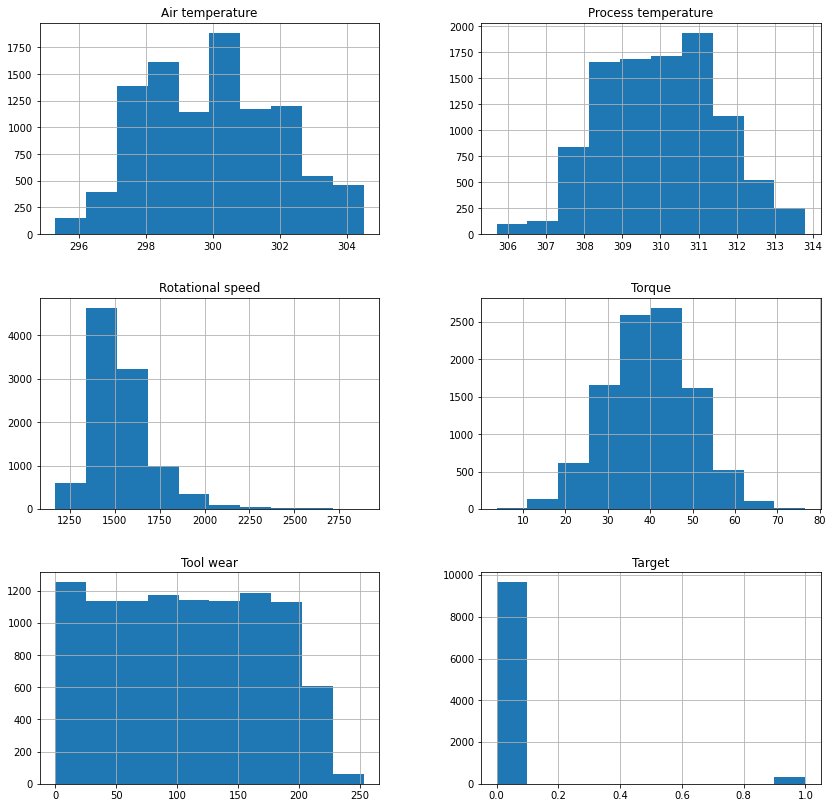

In [ ]:
#PDF's of Features
fig = df.hist(figsize = (14,14))

In [ ]:
#For df_out
df_out.describe()

,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Target
count,9255.000000,9255.000000,9255.000000,9255.000000,9255.000000,9255.0
mean,299.961469,309.989173,1519.065262,40.437850,106.700054,0.0
std,1.987533,1.485247,128.733869,8.677846,62.863708,0.0
min,295.300000,305.700000,1168.000000,20.100000,0.000000,0.0
25%,298.300000,308.800000,1426.000000,34.000000,52.500000,0.0
50%,300.000000,310.000000,1500.000000,40.300000,106.000000,0.0
75%,301.400000,311.000000,1598.000000,46.600000,160.000000,0.0
max,304.500000,313.800000,1895.000000,66.500000,246.000000,0.0


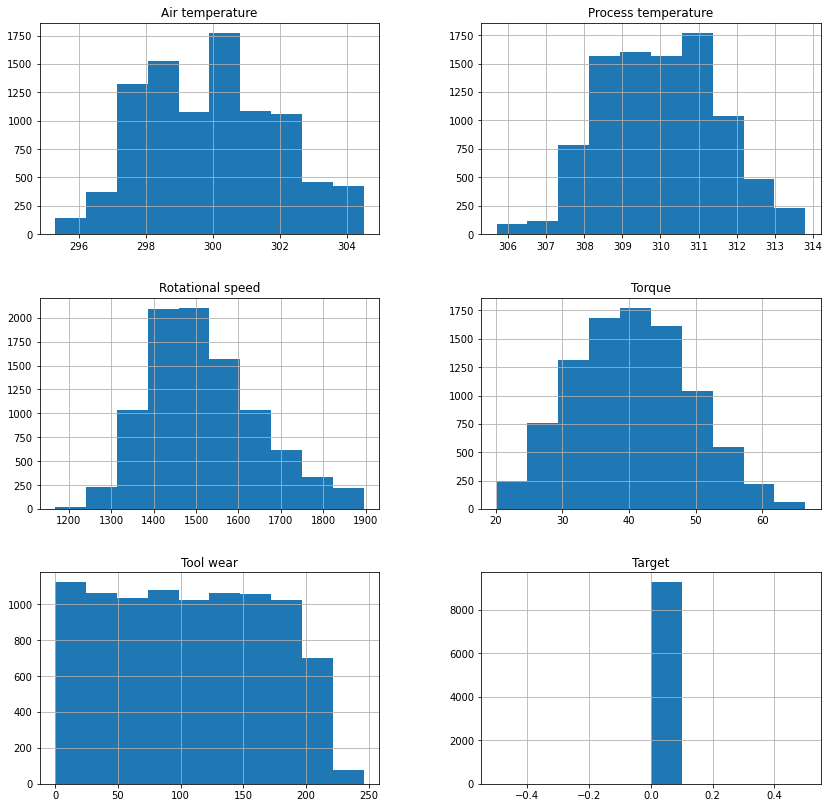

In [ ]:
#PDF's of Features for df_out
fig = df_out.hist(figsize = (14,14))

**It's important to keep in mind that outlier detection is just one aspect of data analysis, and it should be considered in the context of other relevant factors such as the specific domain or context of the data, the purpose of the analysis, and the potential consequences of removing or modifying outlier values.As a result we keep the outliers for now and we reserve the right to decide whether to act on them or not after considering other aspects.**

In [ ]:
## Converting temperature in centigrate from Kelvin [1 K = -272.15 °C  ] 

df["Air temperature"] = df["Air temperature"] - 272.15
df["Process temperature"] = df["Process temperature"] - 272.15

# Renaming temperature in Centigrate(°C) from Kelvin (K)
df.rename(columns={"Air temperature" : "Air temperature [°C]","Process temperature" : "Process temperature [°C]"},inplace=True)

In [ ]:
df["Temperature difference [°C]"] = df["Process temperature [°C]"] - df["Air temperature [°C]"]
df.sample(5)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed,Torque,Tool wear,Target,Failure Type,Temperature difference [°C]
5742,M,29.75,39.15,1522.0,35.6,63.0,0,No Failure,9.4
1134,M,24.75,35.65,1426.0,50.7,130.0,0,No Failure,10.9
4750,H,31.55,39.75,1332.0,52.7,66.0,1,Heat Dissipation Failure,8.2
6642,L,29.15,38.25,1504.0,47.2,193.0,0,No Failure,9.1
8953,M,24.75,35.35,1332.0,51.1,121.0,0,No Failure,10.6


## **VISUALIZATION**

### **Univariate**

In [ ]:
for col in df[['Type','Target','Failure Type']]:
    print(df[col].value_counts()) 
    print("****"*8)

L    5984
M    2991
H     998
Name: Type, dtype: int64
********************************
0    9643
1     330
Name: Target, dtype: int64
********************************
No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: Failure Type, dtype: int64
********************************


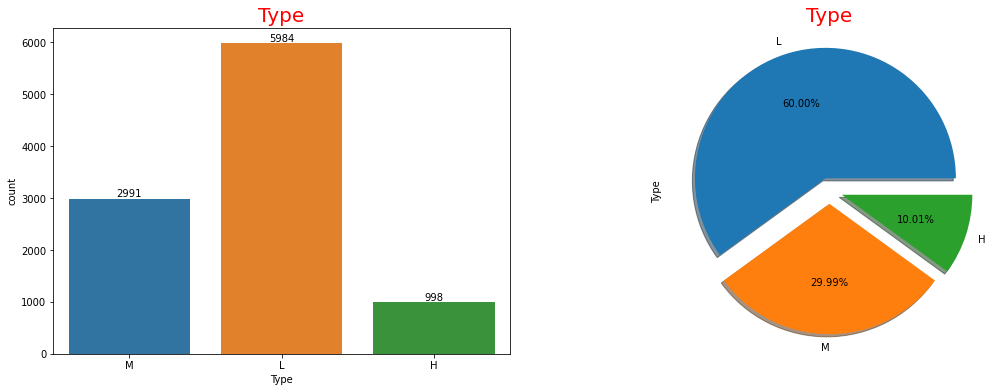

In [ ]:
#For_Type
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Type', data=df)
ax.bar_label(ax.containers[0])
plt.title("Type", fontsize=20,color='Red')
ax =plt.subplot(1,2,2)
ax=df['Type'].value_counts().plot.pie(explode=[0.1, 0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Type", fontsize = 20,color='Red');

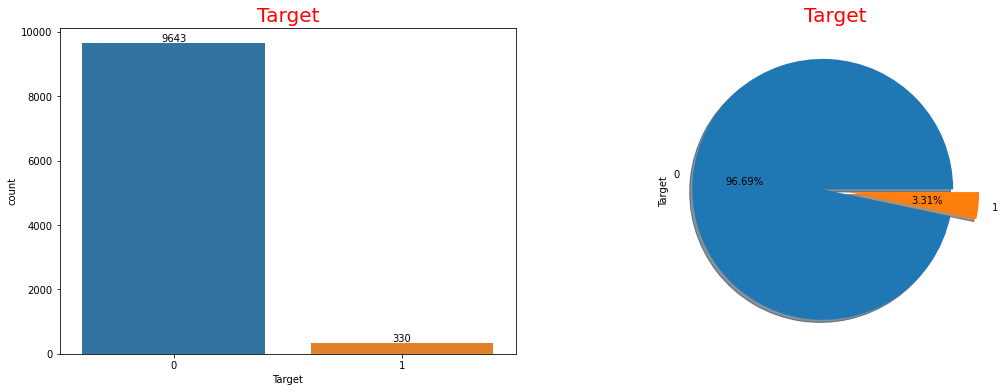

In [ ]:
ax = plt.figure(figsize=(18,6))
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='Target', data=df)
ax.bar_label(ax.containers[0])
plt.title("Target", fontsize=20,color='Red')
ax =plt.subplot(1,2,2)
ax=df['Target'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Target", fontsize = 20,color='Red');

## **Bivariate**

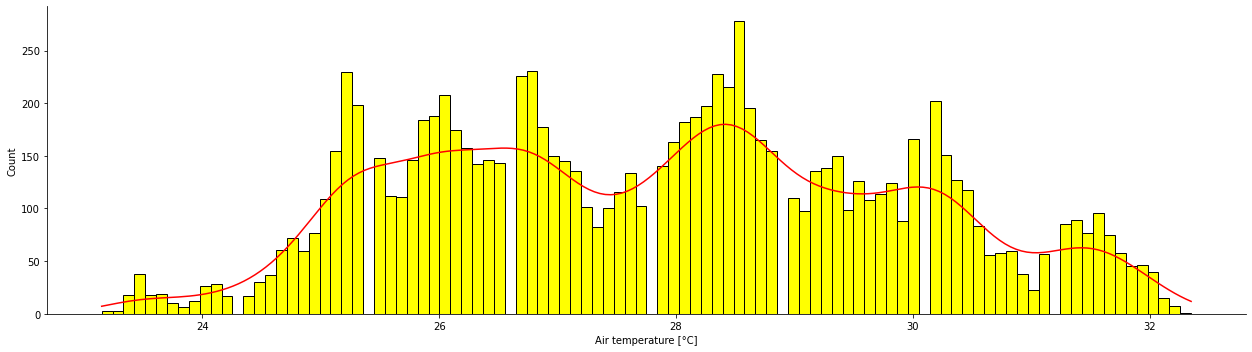

In [ ]:
sns.displot(data=df, x="Air temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "yellow",height = 5, aspect = 3.5);

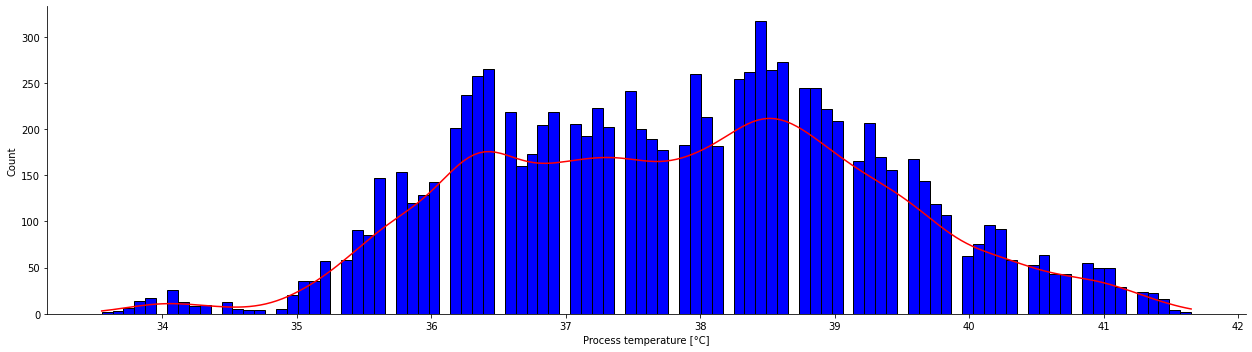

In [ ]:
sns.displot(data=df, x="Process temperature [°C]", kde=True, bins = 100,color = "red", facecolor = "blue",height = 5, aspect = 3.5);

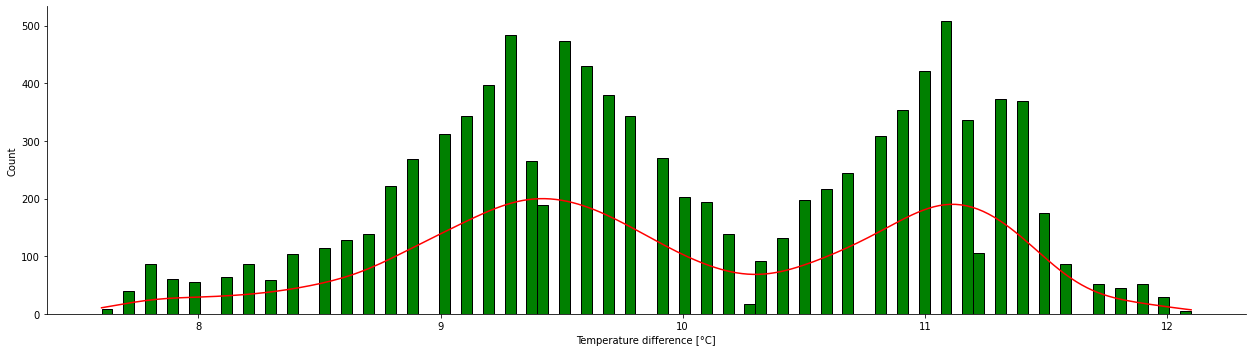

In [ ]:
sns.displot(data=df, x="Temperature difference [°C]", kde=True, bins = 100,color = "red", facecolor = "green",height = 5, aspect = 3.5);

## **Multivariate**

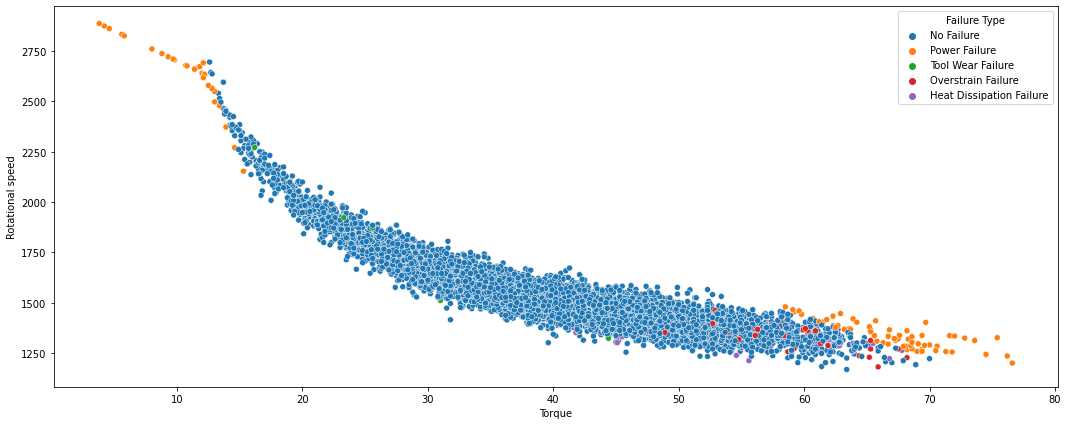

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque", y="Rotational speed", hue="Failure Type",palette="tab10");

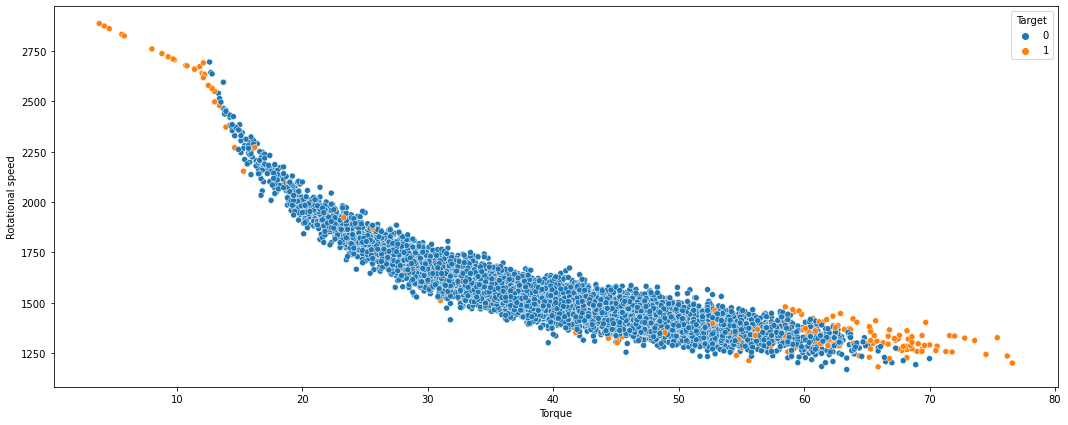

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque", y="Rotational speed", hue="Target",palette="tab10");

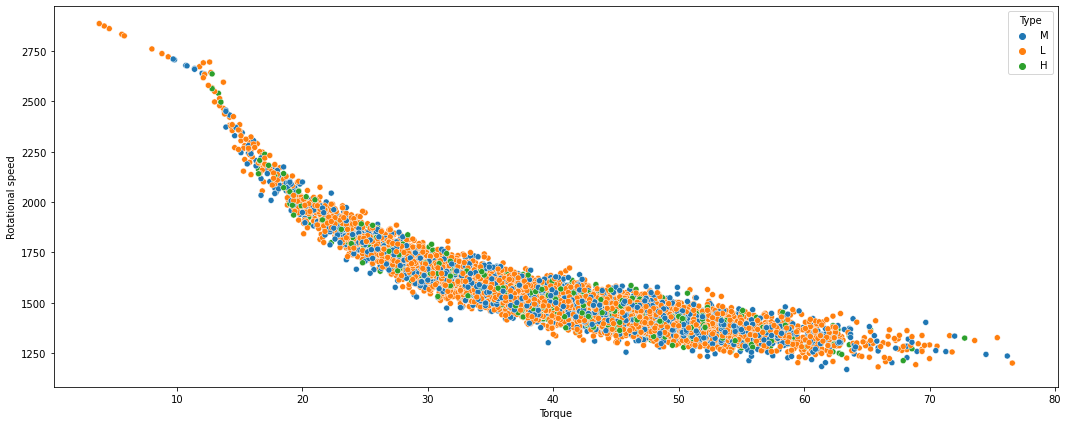

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(data=df, x="Torque", y="Rotational speed", hue="Type",palette="tab10");

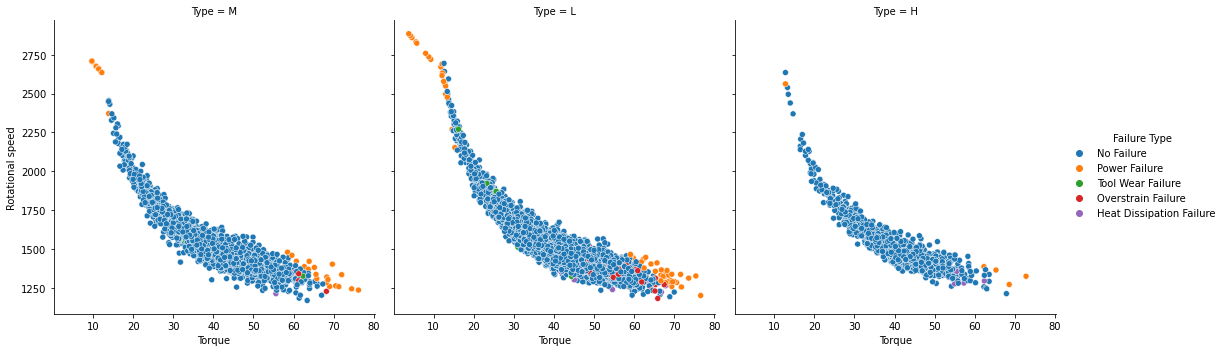

In [ ]:
sns.relplot(data=df, x="Torque", y="Rotational speed", hue="Failure Type",col="Type",palette='tab10');

### **Basic Outlook On Type**

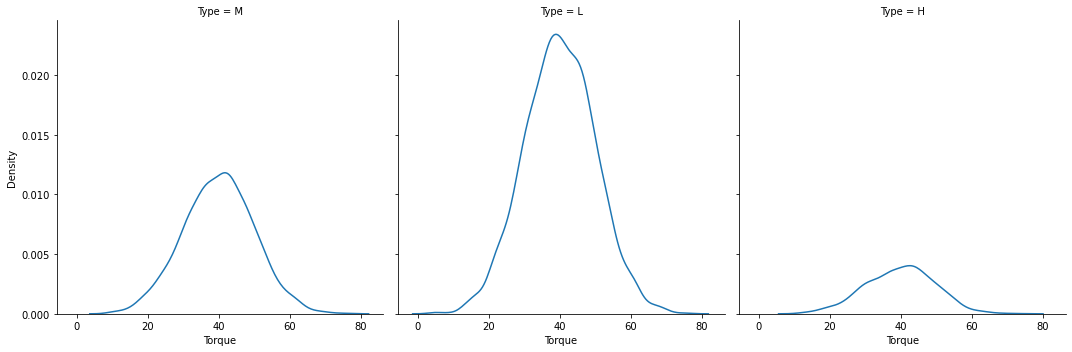

In [ ]:
sns.displot(data=df, x="Torque", col="Type", kind="kde");

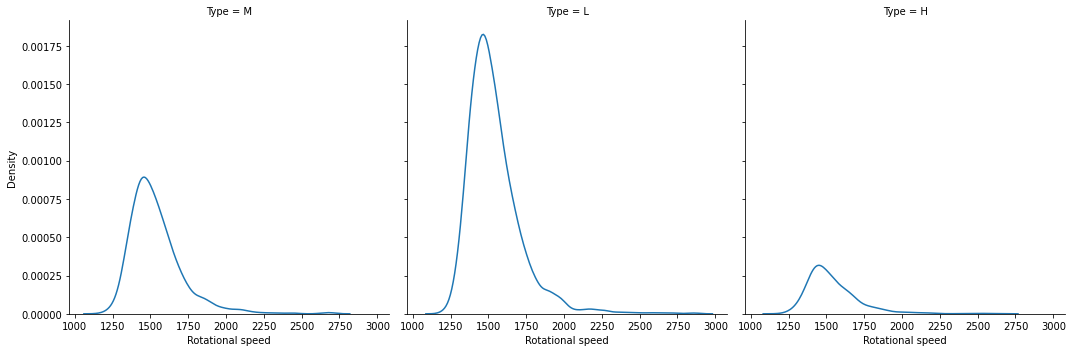

In [ ]:
sns.displot(data=df, x="Rotational speed", col="Type", kind="kde");


## **Encoding & Feature Selection**

In [ ]:
!pip install category_encoders


In [ ]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Type','Failure Type'])
df = encoder.fit_transform(df)
#df.head(50)

In [ ]:
df['Failure Type'].unique()


array([1, 2, 3, 4, 5])

In [ ]:
df['Type'].unique()


array([1, 2, 3])

In [ ]:
df.head(10)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed,Torque,Tool wear,Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551.0,42.8,0.0,0,1,10.5
1,2,26.05,36.55,1408.0,46.3,3.0,0,1,10.5
2,2,25.95,36.35,1498.0,49.4,5.0,0,1,10.4
3,2,26.05,36.45,1433.0,39.5,7.0,0,1,10.4
4,2,26.05,36.55,1408.0,40.0,9.0,0,1,10.5
5,1,25.95,36.45,1425.0,41.9,11.0,0,1,10.5
6,2,25.95,36.45,1558.0,42.4,14.0,0,1,10.5
7,2,25.95,36.45,1527.0,40.2,16.0,0,1,10.5
8,1,26.15,36.55,1667.0,28.6,18.0,0,1,10.4
9,1,26.35,36.85,1741.0,28.0,21.0,0,1,10.5


In [ ]:
from sklearn.preprocessing import LabelEncoder
scaler = LabelEncoder()
df['Failure Type'] = scaler.fit_transform(df['Failure Type'])

In [ ]:
df.head(10)

,Type,Air temperature [°C],Process temperature [°C],Rotational speed,Torque,Tool wear,Target,Failure Type,Temperature difference [°C]
0,1,25.95,36.45,1551.0,42.8,0.0,0,0,10.5
1,2,26.05,36.55,1408.0,46.3,3.0,0,0,10.5
2,2,25.95,36.35,1498.0,49.4,5.0,0,0,10.4
3,2,26.05,36.45,1433.0,39.5,7.0,0,0,10.4
4,2,26.05,36.55,1408.0,40.0,9.0,0,0,10.5
5,1,25.95,36.45,1425.0,41.9,11.0,0,0,10.5
6,2,25.95,36.45,1558.0,42.4,14.0,0,0,10.5
7,2,25.95,36.45,1527.0,40.2,16.0,0,0,10.5
8,1,26.15,36.55,1667.0,28.6,18.0,0,0,10.4
9,1,26.35,36.85,1741.0,28.0,21.0,0,0,10.5


In [ ]:
df['Failure Type'].unique()


array([0, 1, 2, 3, 4])

## **CORRELATION**

In [ ]:
df.corr()

,Type,Air temperature [°C],Process temperature [°C],Rotational speed,Torque,Tool wear,Target,Failure Type
Type,1.000000,-0.017718,-0.013974,0.002891,-0.004302,0.004513,0.006490,0.011016
Air temperature [°C],-0.017718,1.000000,0.876068,0.023332,-0.014553,0.014370,0.083066,0.110903
Process temperature [°C],-0.013974,0.876068,1.000000,0.020200,-0.015275,0.013970,0.035997,0.049028
Rotational speed,0.002891,0.023332,0.020200,1.000000,-0.875069,-0.000110,-0.044042,-0.117205
Torque,-0.004302,-0.014553,-0.015275,-0.875069,1.000000,-0.002552,0.193420,0.198465
Tool wear,0.004513,0.014370,0.013970,-0.000110,-0.002552,1.000000,0.106337,0.098256
Target,0.006490,0.083066,0.035997,-0.044042,0.193420,0.106337,1.000000,0.904246
Failure Type,0.011016,0.110903,0.049028,-0.117205,0.198465,0.098256,0.904246,1.000000


In [ ]:
corr=df.corr()

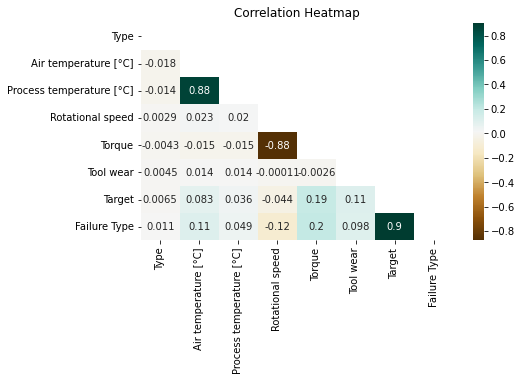

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(7,4))
sns.heatmap(data=corr, mask=np.triu(corr), annot=True, cmap='BrBG')
plt.title('Correlation Heatmap')
plt.show()

## **SPLIT AND SCALE**

In [ ]:
X = df.drop(columns="Failure Type" , axis=1)
y = df["Failure Type"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [ ]:
X_train.shape, X_test.shape

((7479, 8), (2494, 8))

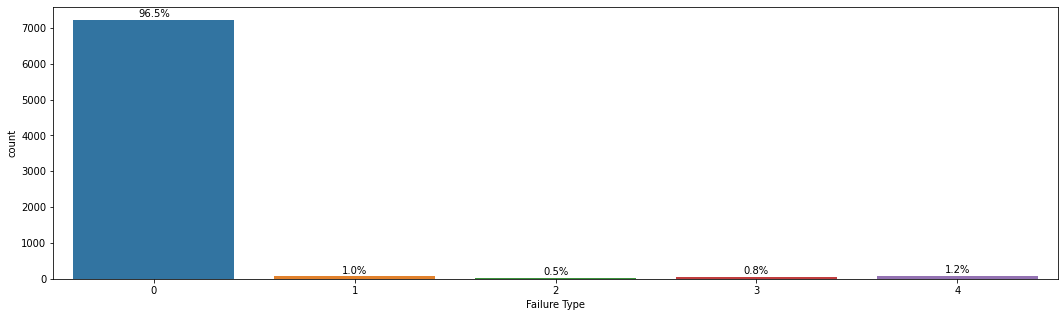

In [ ]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_train, palette = 'tab10')
t= len(y_train)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

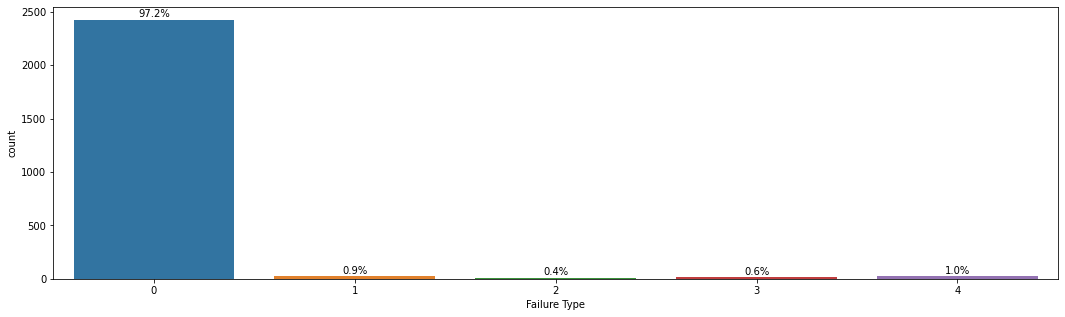

In [ ]:
plt.figure(figsize=(18,5))
ax = sns.countplot(x = y_test, palette = 'tab10')
t= len(y_test)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / t:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## **WORKING ON MODELS AND EVALUATION**

Training Accuracy    : 99.76 %
Model Accuracy Score : 99.8 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2423
           1       1.00      0.95      0.98        22
           2       1.00      0.56      0.71         9
           3       0.88      1.00      0.94        15
           4       0.89      1.00      0.94        25

    accuracy                           1.00      2494
   macro avg       0.96      0.90      0.91      2494
weighted avg       1.00      1.00      1.00      2494

--------------------------------------------------------


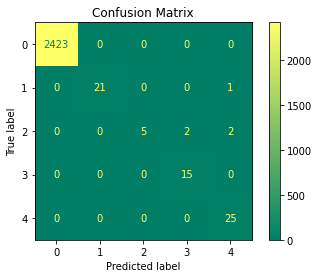

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_std, y_train)
y_pred_lr = logreg.predict(X_test_std)

log_train = round(logreg.score(X_train_std, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_lr, y_test) * 100, 2)


print("Training Accuracy    :",log_train ,"%")
print("Model Accuracy Score :",log_accuracy ,"%")
print("--------------------------------------------------------")
print("Classification_Report: \n",classification_report(y_test,y_pred_lr))
print("--------------------------------------------------------")
cm = confusion_matrix(y_test,y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="summer")
plt.title('Confusion Matrix');
plt.show()



Training Accuracy    : 100.0 %
Model Accuracy Score : 99.8 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2423
           1       0.91      0.91      0.91        22
           2       0.75      0.67      0.71         9
           3       0.94      1.00      0.97        15
           4       1.00      1.00      1.00        25

    accuracy                           1.00      2494
   macro avg       0.92      0.92      0.92      2494
weighted avg       1.00      1.00      1.00      2494

--------------------------------------------------------


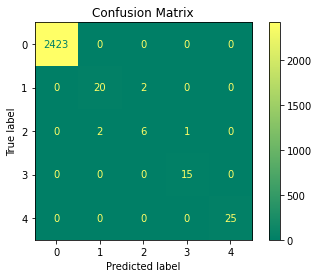

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
decision = DecisionTreeClassifier()
decision.fit(X_train_std, y_train)
y_pred_dec = decision.predict(X_test_std)

decision_train = round(decision.score(X_train_std, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy    :",decision_train ,"%")
print("Model Accuracy Score :",decision_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_dec))
print("\033[1m--------------------------------------------------------\033[0m")

cm = confusion_matrix(y_test,y_pred_dec)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="summer")
plt.title('Confusion Matrix');
plt.show()

Training Accuracy    : 100.0 %
Model Accuracy Score : 99.96 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2423
           1       1.00      1.00      1.00        22
           2       1.00      0.89      0.94         9
           3       0.94      1.00      0.97        15
           4       1.00      1.00      1.00        25

    accuracy                           1.00      2494
   macro avg       0.99      0.98      0.98      2494
weighted avg       1.00      1.00      1.00      2494

--------------------------------------------------------


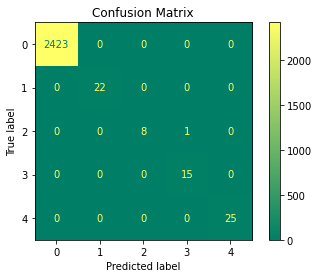

In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_std, y_train)
y_pred_rf = random_forest.predict(X_test_std)
random_forest.score(X_train_std, y_train)

random_forest_train = round(random_forest.score(X_train_std, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

cm = confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="summer")
plt.title('Confusion Matrix');
plt.show()

Training Accuracy    : 99.79 %
Model Accuracy Score : 99.84 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2423
           1       1.00      0.95      0.98        22
           2       1.00      0.67      0.80         9
           3       0.94      1.00      0.97        15
           4       0.89      1.00      0.94        25

    accuracy                           1.00      2494
   macro avg       0.97      0.92      0.94      2494
weighted avg       1.00      1.00      1.00      2494

--------------------------------------------------------


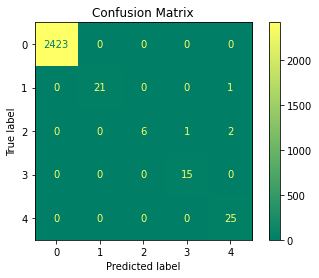

In [ ]:
# Support Vector Machines
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_std, y_train)
y_pred_svc = svc.predict(X_test_std)

svc_train = round(svc.score(X_train_std, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")

cm = confusion_matrix(y_test,y_pred_svc)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="summer")
plt.title('Confusion Matrix');
plt.show()


## **RESULT**

In [ ]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest',
        'Decision Tree'
    ],
    
    'Training Accuracy':
    [log_train, svc_train, decision_train, random_forest_train],
    
    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy
    ]
})

In [ ]:
models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(
        cmap='summer').hide_index()

<ipython-input-115-9db43b347f7b>:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis='index')`
  models.sort_values(by='Model Accuracy Score', ascending=False).style.background_gradient(


Model,Training Accuracy,Model Accuracy Score
Decision Tree,100.000000,99.960000
Logistic Regression,99.790000,99.840000
Support Vector Machines,99.760000,99.800000
Random Forest,100.000000,99.800000


In [ ]:
prediction1 = random_forest.predict(X_test_std)
print(prediction1)

[0 0 0 ... 0 0 0]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction1})
cross_checking.sample(5).style.background_gradient(
        cmap='coolwarm')

,Actual,Predicted
1717,0,0
7772,0,0
7378,0,0
1282,0,0
9939,0,0
